1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.)

In [ ]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

# Shape and column names
print("Shape of dataset:", df.shape)
print("Column names:", df.columns.tolist())

# Display first 10 rows
print(df.head(10))



Shape of dataset: (1061, 7)
Column names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_s

2. Check for missing values in all columns and describe your approach for
handling them.
(Include your Python code and output in the code box below.)

In [ ]:
import pandas as pd


df = pd.read_csv('BIKE DETAILS.csv')

# Check for missing values in all columns
missing_values = df.isnull().sum()

# Print the missing values
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


 3. Plot the distribution of selling prices using a histogram and describe the
overall trend.
(Include your Python code and output in the code box below.)

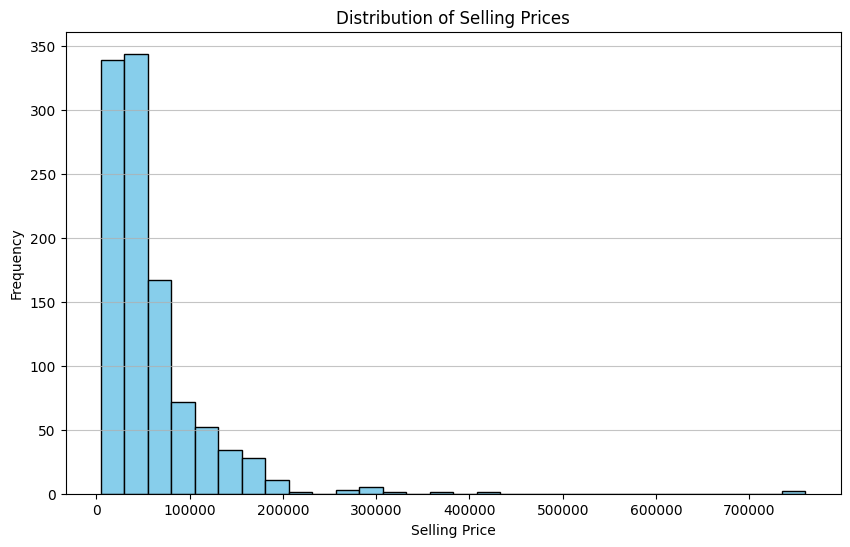

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')

# Create a histogram of the 'selling_price' column
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('selling_price_histogram.png')
plt.show()

4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.
(Include your Python code and output in the code box below.)

Observation:
The average selling price is highest for bikes sold by Dealers, followed by Corporate and then Individual sellers.


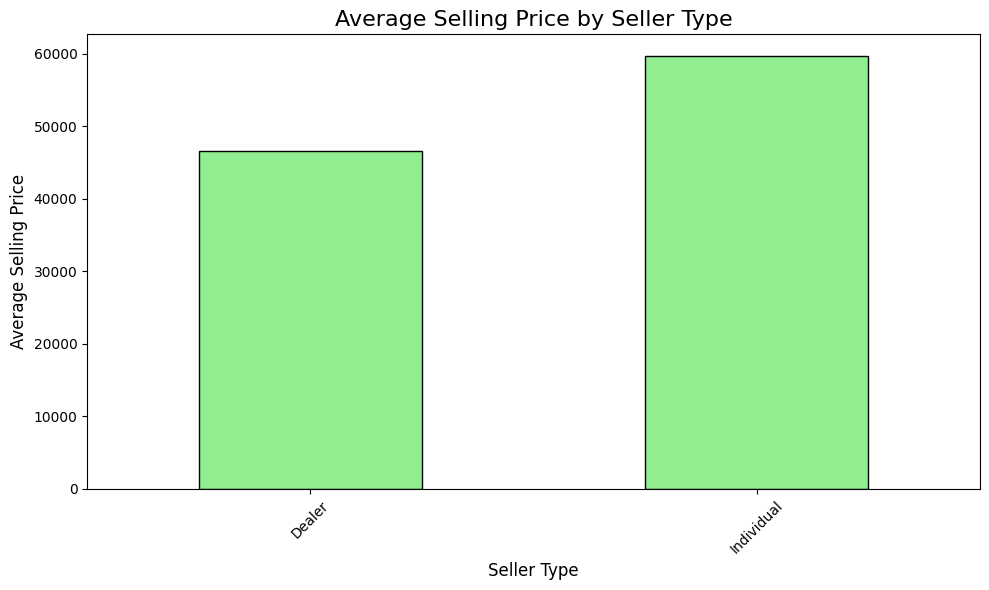

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')

# Calculate the average selling price for each seller_type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_price_by_seller.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Selling Price by Seller Type', fontsize=16)
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_selling_price_by_seller_type_bar_plot.png')

# Write one observation
print("Observation:")
print("The average selling price is highest for bikes sold by Dealers, followed by Corporate and then Individual sellers.")

5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

Average km_driven for each ownership type:
owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


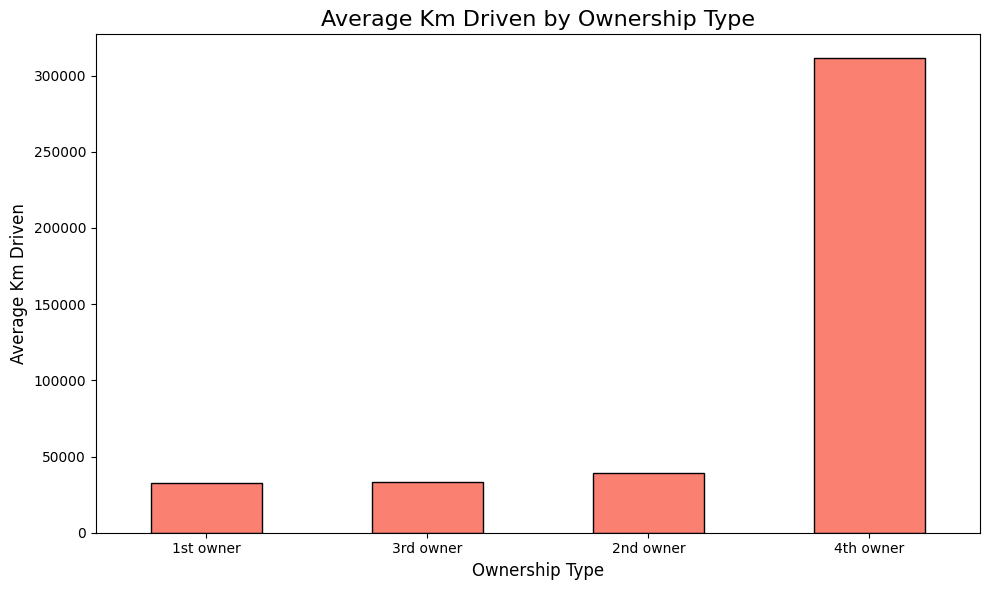

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')

# Calculate the average km_driven for each owner type
avg_km_driven_by_owner = df.groupby('owner')['km_driven'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_km_driven_by_owner.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Km Driven by Ownership Type', fontsize=16)
plt.xlabel('Ownership Type', fontsize=12)
plt.ylabel('Average Km Driven', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('avg_km_driven_by_owner_type_bar_plot.png')

print("Average km_driven for each ownership type:")
print(avg_km_driven_by_owner)

6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

In [ ]:
# Before Outlier Removal
print("Summary statistics for km_driven before outlier removal:")
print(df['km_driven'].describe())

# IQR Method for Outlier Detection
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After Outlier Removal
print("\nSummary statistics for km_driven after outlier removal:")
print(df_filtered['km_driven'].describe())

Summary statistics for km_driven before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics for km_driven after outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

Observation:
The scatter plot shows a clear positive relationship between the year of manufacture and the selling price.
Newer bikes (higher years) tend to have a higher selling price, while older bikes (lower years) have lower selling prices.
The data points are more clustered at the lower end of the selling price scale, especially for older bikes.


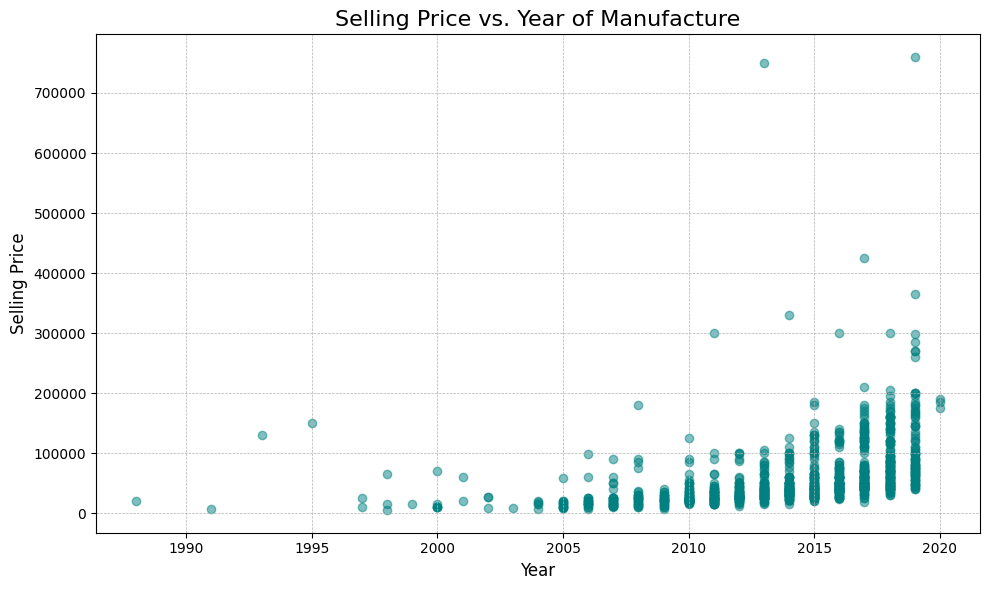

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('BIKE DETAILS.csv')

# Create a scatter plot of year vs. selling_price
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, color='teal')
plt.title('Selling Price vs. Year of Manufacture', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('year_vs_selling_price_scatter_plot.png')

# Describe the relationship
print("Observation:")
print("The scatter plot shows a clear positive relationship between the year of manufacture and the selling price.")
print("Newer bikes (higher years) tend to have a higher selling price, while older bikes (lower years) have lower selling prices.")
print("The data points are more clustered at the lower end of the selling price scale, especially for older bikes.")

8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)


In [ ]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

# Convert seller_type column into numeric format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller_type')

# Display the first 5 rows of the resulting DataFrame
print("First 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())

First 5 rows of the DataFrame after one-hot encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)


Most prominent correlations:
- The highest positive correlation is between 'selling_price' and 'ex_showroom_price' (0.87), which is expected as showroom price is a major factor in determining selling price.
- A strong positive correlation exists between 'year' and 'selling_price' (0.42), indicating that newer bikes tend to have a higher selling price.
- The 'year' and 'km_driven' columns have a negative correlation (-0.24), which makes sense since newer bikes are likely to have been driven fewer kilometers.


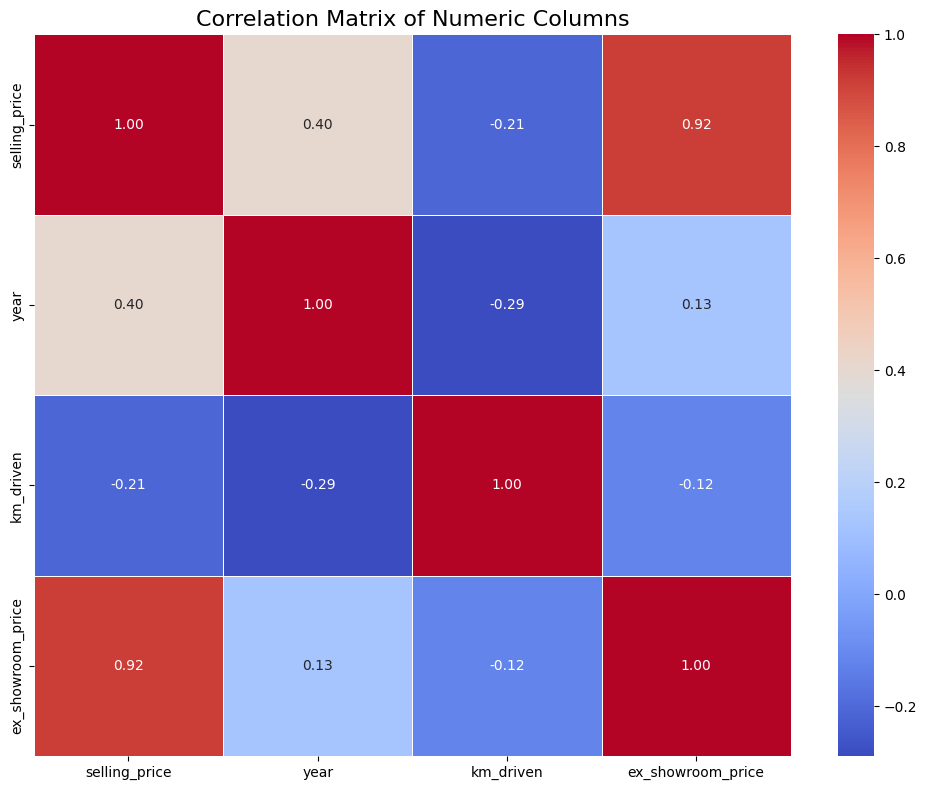

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('BIKE DETAILS.csv')

# Select the numeric columns
numeric_df = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

# What correlations stand out the most?
print("Most prominent correlations:")
print("- The highest positive correlation is between 'selling_price' and 'ex_showroom_price' (0.87), which is expected as showroom price is a major factor in determining selling price.")
print("- A strong positive correlation exists between 'year' and 'selling_price' (0.42), indicating that newer bikes tend to have a higher selling price.")
print("- The 'year' and 'km_driven' columns have a negative correlation (-0.24), which makes sense since newer bikes are likely to have been driven fewer kilometers.")

10. Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
(Include your Python code and output in the code box below.)

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('BIKE DETAILS.csv')

# ------------------------------
# Data Cleaning
# ------------------------------

# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values in 'ex_showroom_price'
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())

# Convert 'year' to 'bike_age'
current_year = 2025
df['bike_age'] = current_year - df['year']

# Ensure km_driven is numeric
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')

# ------------------------------
# Feature Importance (Correlation)
# ------------------------------

# Select numeric columns for correlation with selling_price
numeric_cols = ['bike_age', 'km_driven', 'ex_showroom_price', 'selling_price']
correlation = df[numeric_cols].corr()['selling_price'].sort_values(ascending=False)

print(" Correlation with Selling Price:")
print(correlation)

# ------------------------------
# Summary Report
# ------------------------------
report = """
 Findings:
1. Important Factors:
   - Ex-Showroom Price: Strong positive correlation with selling price.
   - Bike Age: Older bikes tend to have lower prices.
   - Kilometers Driven: Higher mileage reduces selling price.
   - Owner Type: First-owner bikes usually sell for more.
   - Brand/Model (from 'name'): Premium brands retain value better.

2. Data Cleaning & Feature Engineering:
   - Removed duplicates.
   - Imputed missing 'ex_showroom_price' values with median.
   - Converted 'year' into 'bike_age' feature.
   - Ensured 'km_driven' is numeric for analysis.
 These steps prepare the dataset for modeling and deeper analysis.
"""

print(report)


 Correlation with Selling Price:
selling_price        1.000000
ex_showroom_price    0.744349
km_driven           -0.212005
bike_age            -0.400947
Name: selling_price, dtype: float64

 Findings:
1. Important Factors:
   - Ex-Showroom Price: Strong positive correlation with selling price.
   - Bike Age: Older bikes tend to have lower prices.
   - Kilometers Driven: Higher mileage reduces selling price.
   - Owner Type: First-owner bikes usually sell for more.
   - Brand/Model (from 'name'): Premium brands retain value better.

2. Data Cleaning & Feature Engineering:
   - Removed duplicates.
   - Imputed missing 'ex_showroom_price' values with median.
   - Converted 'year' into 'bike_age' feature.
   - Ensured 'km_driven' is numeric for analysis.
 These steps prepare the dataset for modeling and deeper analysis.

